# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
mp.style.use('ggplot')

# Loading Data

In [3]:
#loading the data
car=pd.read_csv("C:\\Users\\dell\\Downloads\\quikr_car.csv")
#loading all first 5 entries
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
#loading all last 5 entries
car.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [5]:
#displays the shape of the data
car.shape

(892, 6)

In [6]:
#Displays the information as per given in the data
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Create a backup copy

In [7]:
#create a backup copy
backup=car.copy()

# Cleaning Data

In [8]:
# Filter out rows where the 'year' column is not numeric
car = car[car['year'].str.isnumeric()]
# Convert the 'year' column to integer type
car['year'] = car['year'].astype(int)
# Filter out rows where the 'Price' column is 'Ask For Price'
car = car[car['Price'] != 'Ask For Price']
# Remove commas and convert the 'Price' column to integer
car['Price'] = car['Price'].str.replace(',', '').astype(int)
# Extract numeric values from 'kms_driven' and convert to integer
car['kms_driven'] = car['kms_driven'].str.split().str.get(0).str.replace(',', '')
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)
# Remove rows with missing values in the 'fuel_type' column
car = car[~car['fuel_type'].isna()]
# Check the final shape of the DataFrame
car.shape

(816, 6)

In [9]:
# Clean the 'name' column by keeping the first three words
car['name'] = car['name'].str.split().str.slice(start=0, stop=3).str.join(' ')

# Reset the DataFrame index
car = car.reset_index(drop=True)

# Display the cleaned DataFrame
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [10]:
# Save the cleaned DataFrame to a CSV file
car.to_csv('CarClear_data.csv')

# Display DataFrame information
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [11]:
# Generate descriptive statistics for all columns
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [12]:
car=car[car['Price']<6000000]

In [13]:
car=car.reset_index(drop=True)

# Data Visualizations

C:\Users\dell\AppData\Local\Temp\ipykernel_9900\2199975589.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


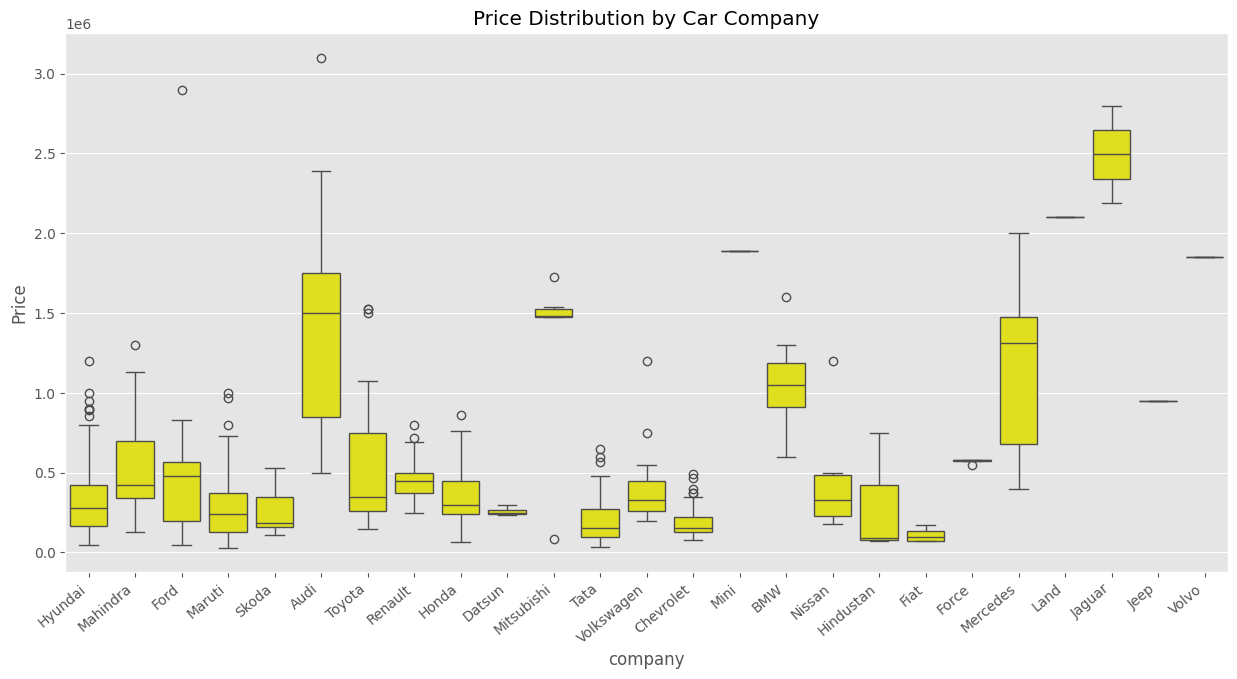

In [14]:
# Create a larger plot area
plt.subplots(figsize=(15, 7))
# Create a boxplot of 'Price' by 'company' with a blue color
ax = sns.boxplot(x='company', y='Price', data=car, color='yellow')
# Rotate and adjust x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
#title 
plt.title("Price Distribution by Car Company")
# display the boxplot
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_9900\698890028.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(x='year', y='Price', data=car,palette='Set2')  # Change the color palette to 'Set1'
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be

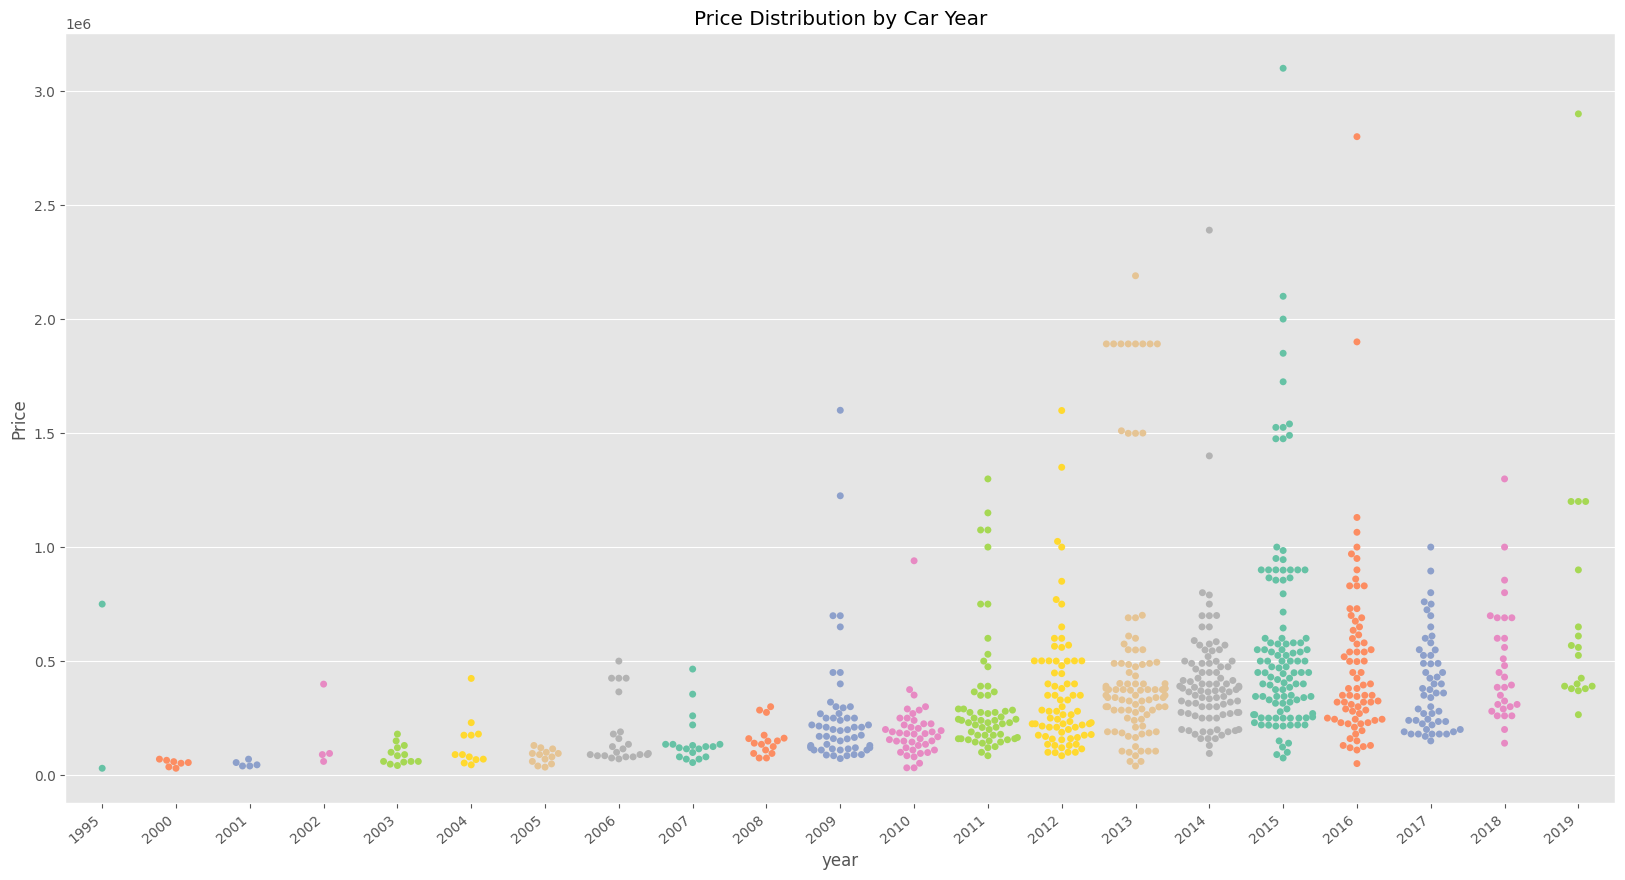

In [15]:
# Create a larger plot area
plt.subplots(figsize=(20, 10))
# Create a swarmplot of 'Price' by 'year' with different data point colors
ax = sns.swarmplot(x='year', y='Price', data=car,palette='Set2')  # Change the color palette to 'Set1'
# Rotate and adjust x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
#title 
plt.title("Price Distribution by Car Year")
#display the swarmplots
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_9900\276342693.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x='kms_driven', y='Price', data=car, height=7, aspect=1.5, palette='viridis')  # Change the color palette to 'viridis'


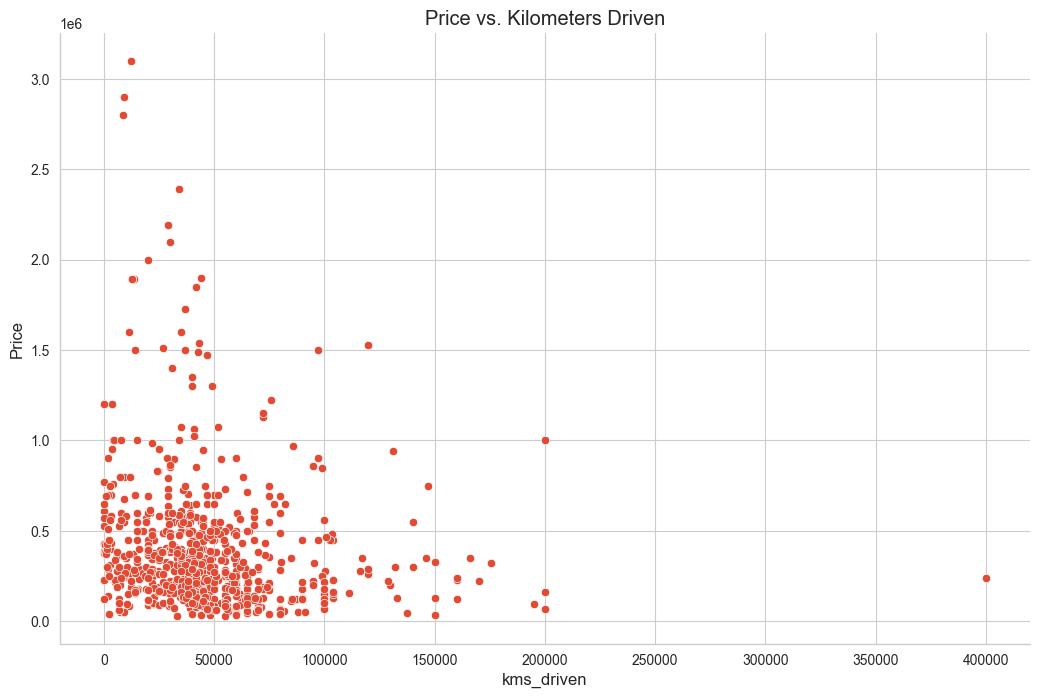

In [16]:
# Create a scatter plot using relplot with different data point colors
sns.set_style("whitegrid")  # Set a white grid background
sns.relplot(x='kms_driven', y='Price', data=car, height=7, aspect=1.5, palette='viridis')  # Change the color palette to 'viridis'
#title
plt.title("Price vs. Kilometers Driven")
# Display the scatter plot
plt.show()

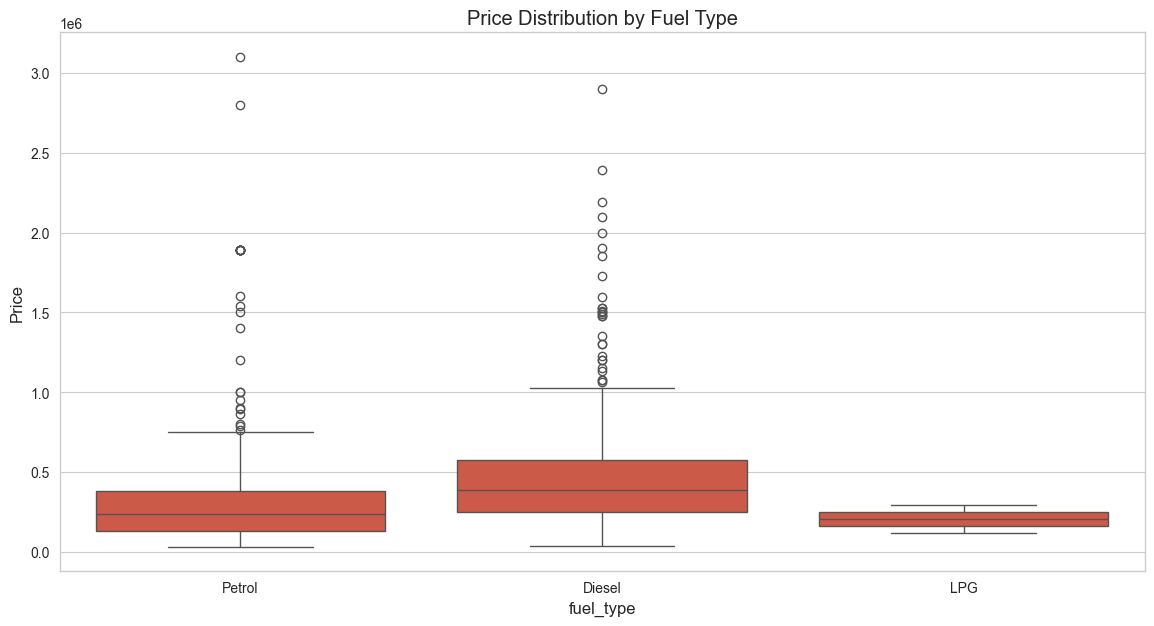

In [17]:
# Create a larger plot area
plt.subplots(figsize=(14, 7))
# Create a boxplot of 'Price' by 'fuel_type' with different colors
sns.set_palette("Set3")  # Set a different color palette
sns.boxplot(x='fuel_type', y='Price', data=car)
# Set the title of the boxplot
plt.title("Price Distribution by Fuel Type")
# Display the boxplot
plt.show()


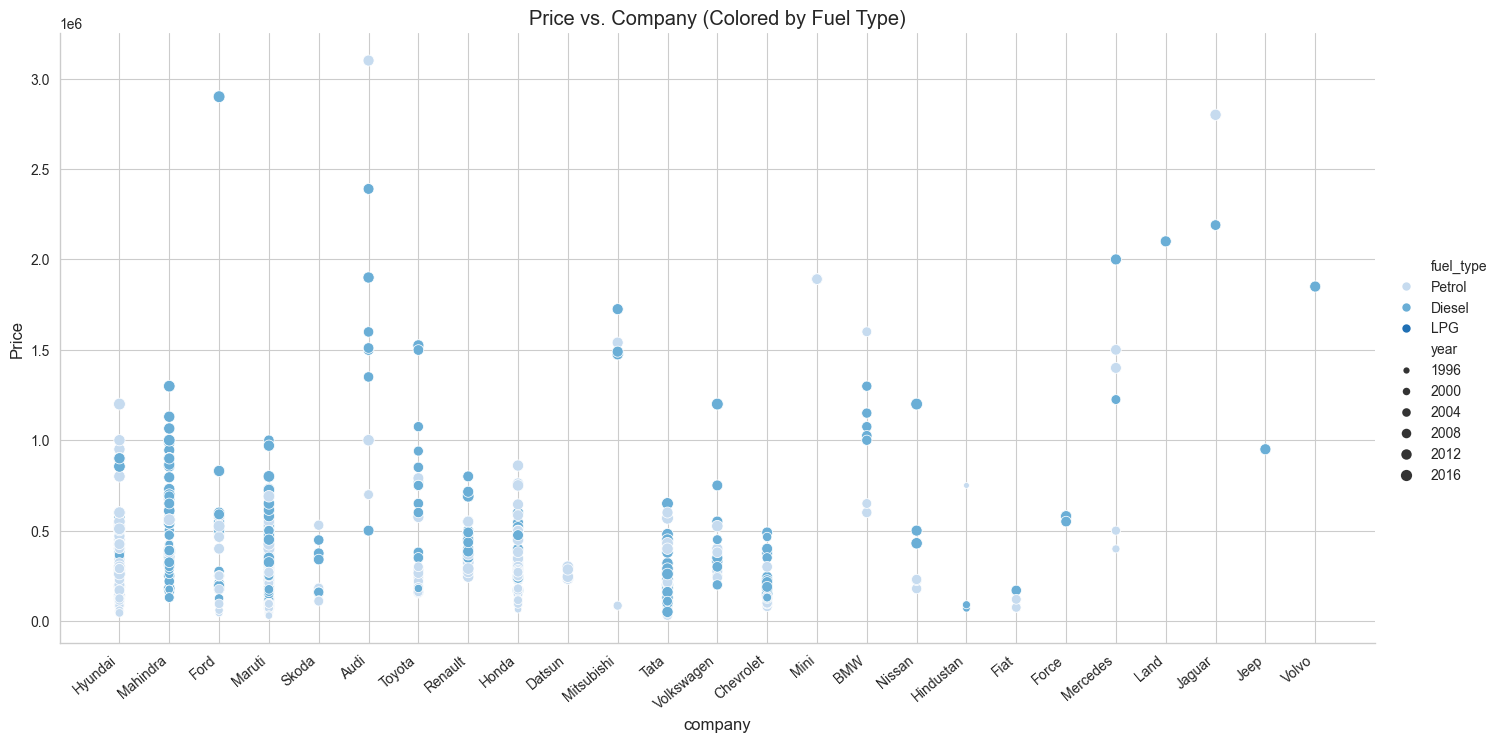

In [18]:
# Create a scatter plot using relplot with specified attributes
ax = sns.relplot(x='company', y='Price', data=car, hue='fuel_type', size='year', height=7, aspect=2,palette='Blues')  # Change the color palette to 'Set2'
# Adjust x-axis labels for readability
ax.set_xticklabels(rotation=40, ha='right')
# Set the title of the scatter plot
ax.set(title="Price vs. Company (Colored by Fuel Type)")
# Display the scatter plot
plt.show()

In [19]:
#Extracting data from the dataset
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [20]:
y.shape

(815,)

# Applying Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#creating an OneHotEncoder object to contain all the possible categories
oh=OneHotEncoder()
oh.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [22]:
#creating a column transformer to transform categorical columns
column=make_column_transformer((OneHotEncoder(categories=oh.categories_),['name','company','fuel_type']),remainder='passthrough')

# Linear Regression Model

In [23]:
#linear regression model
lr=LinearRegression()
#make a pipeline
pipeline=make_pipeline(column,lr)
#fitting the model
pipeline.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [24]:
y_pred=pipeline.predict(x_test)
#checks the R2 score
r2_score(y_test,y_pred)

0.6159009563106261

In [27]:
#find the model with a random state of TrainTestSplit where the model was found to give r2_score
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipeline=make_pipeline(column,lr)
    pipeline.fit(x_train,y_train)
    y_pred=pipeline.predict(x_test)
    scores.append(r2_score(y_test,y_pred))
# Find the index of the maximum value in the 'scores' array
np.argmax(scores)

302

In [28]:
# Get the maximum value from the 'scores' array
scores[np.argmax(scores)]

0.8991157554877304

In [29]:
# Create a DataFrame with a single row of data for prediction
pipeline.predict(pd.DataFrame(columns=x_test.columns, data=np.array(['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']).reshape(1, 5)))

array([430301.37134528])

In [30]:
# Split the dataset into training and testing sets with a 10% test size
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=np.argmax(scores))
# Create a Linear Regression model
lr = LinearRegression()
# Create a pipeline that includes data preprocessing steps and the Linear Regression model
pipeline = make_pipeline(column, lr)
# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)
# Predict the target variable on the test data
y_pred = pipeline.predict(x_test)
# Calculate the R-squared score to evaluate the model's performance
r2_score(y_test, y_pred)

0.8991157554877304

In [31]:
import pickle


In [32]:
# Save the trained pipeline to a file using Pickle
pickle.dump(pipeline, open('LinearRegressionModel.pkl', 'wb'))

In [33]:
# Predict the target variable for a new data point using the trained pipeline
pipeline.predict(pd.DataFrame(columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'], data=np.array(['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']).reshape(1, 5)))

array([456670.3272301])

In [34]:
# Access the categories of the first categorical feature in the pipeline
pipeline.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese